IMPORTING LIBRARIES AND DATA

In [15]:
!pip install lazypredict

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore

import lazypredict
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('/content/baseball.csv')

UNDERSTANDING THE DATA

In [18]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [20]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,80.97,688.23,5516.27,1403.53,274.73,31.30,163.63,469.10,1248.20,83.50,688.23,635.83,3.96,3.47,11.30,43.07,94.33
std,10.45,58.76,70.47,57.14,18.10,10.45,31.82,57.05,103.76,22.82,72.11,70.14,0.45,2.76,4.12,7.87,13.96
min,63.00,573.00,5385.00,1324.00,236.00,13.00,100.00,375.00,973.00,44.00,525.00,478.00,2.94,0.00,4.00,28.00,75.00
25%,74.00,651.25,5464.00,1363.00,262.25,23.00,140.25,428.25,1157.50,69.00,636.25,587.25,3.68,1.00,9.00,37.25,86.00
50%,81.00,689.00,5510.00,1382.50,275.50,31.00,158.50,473.00,1261.50,83.50,695.50,644.50,4.03,3.00,12.00,42.00,91.00
75%,87.75,718.25,5570.00,1451.50,288.75,39.00,177.00,501.25,1311.50,96.50,732.50,679.25,4.22,5.75,13.00,46.75,96.75
max,100.00,891.00,5649.00,1515.00,308.00,49.00,232.00,570.00,1518.00,134.00,844.00,799.00,5.04,11.00,21.00,62.00,126.00


  PREPARATION OF THE DATA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


UNDERSTANDING FEATURES

<Axes: xlabel='W', ylabel='count'>

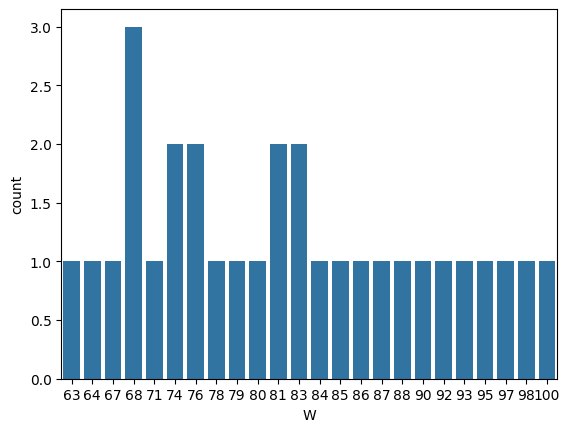

In [22]:
sns.countplot(x='W', data=df)

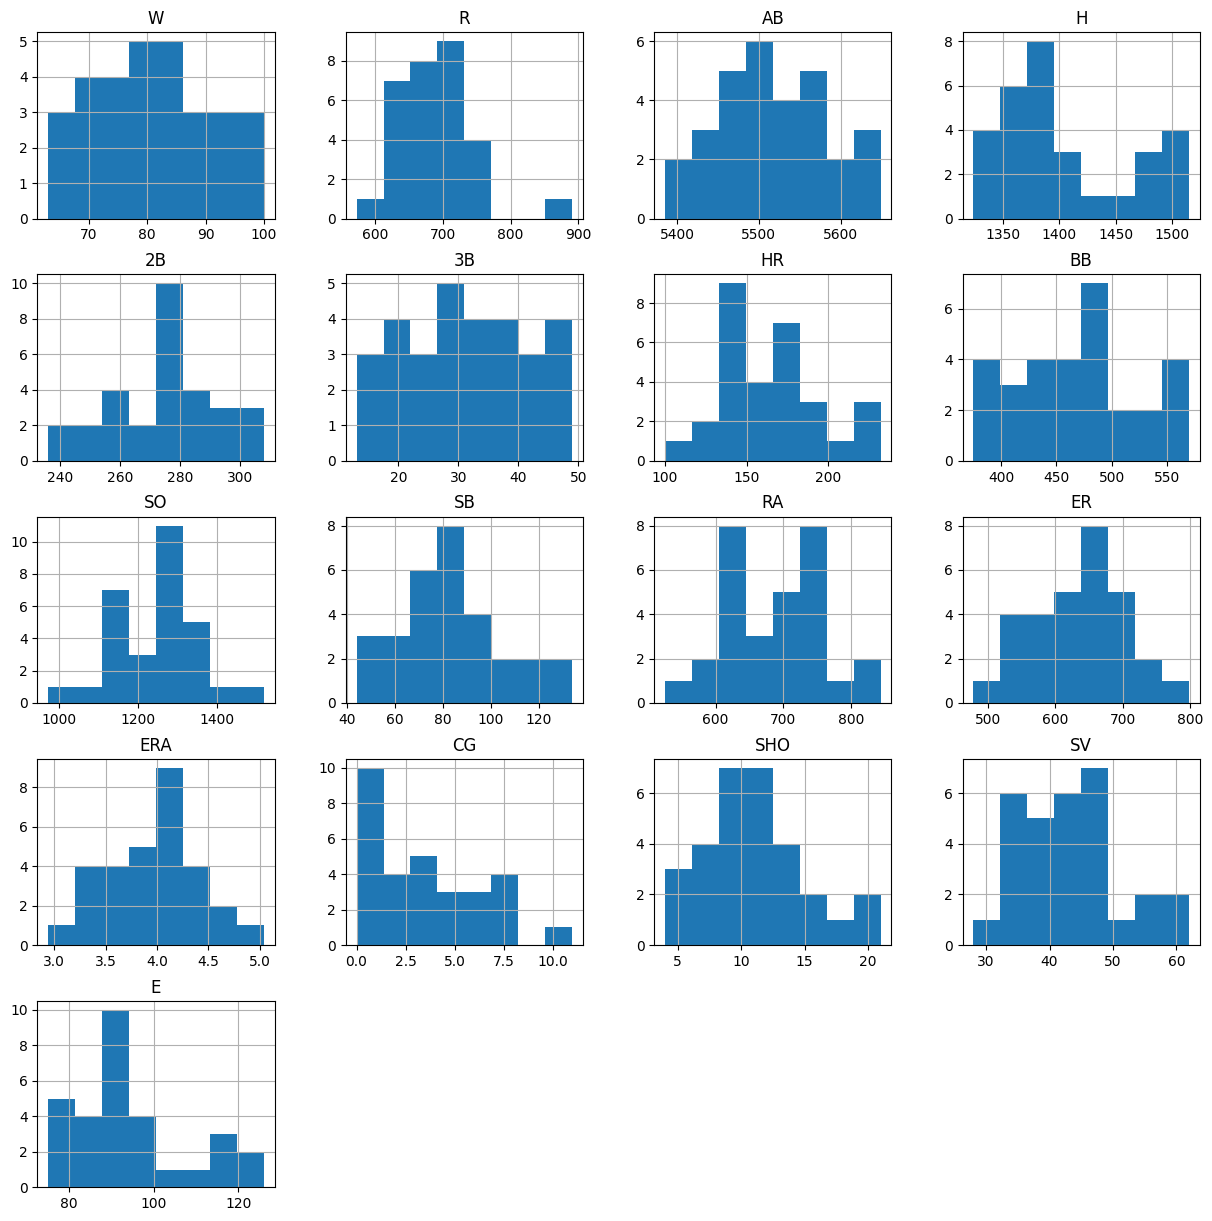

In [23]:
df.hist(bins=8, figsize=(15,15));
plt.show()

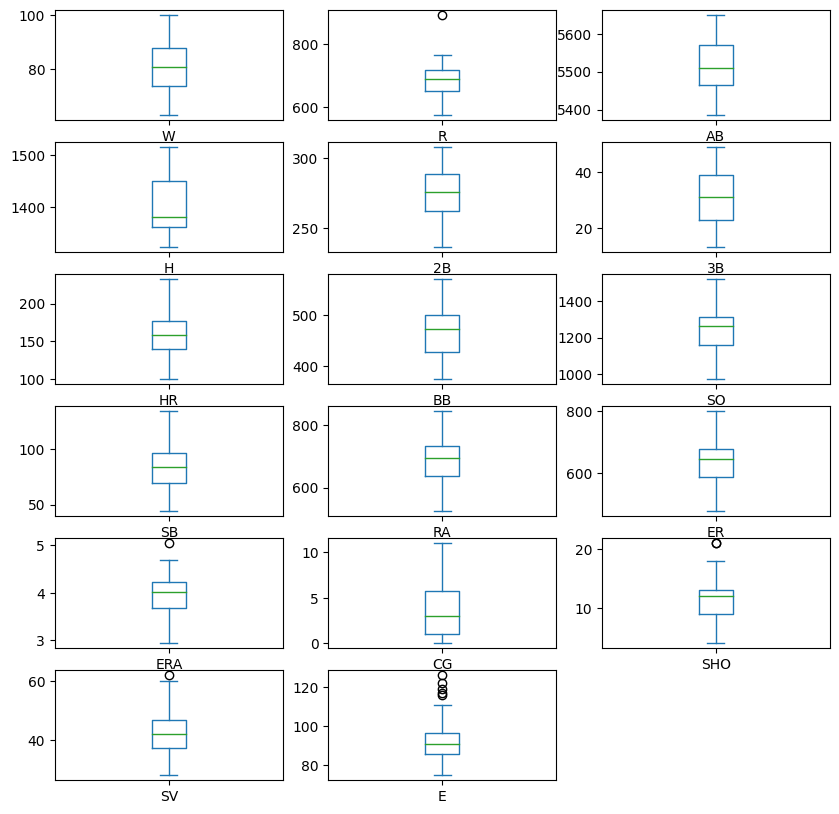

In [24]:
df.plot(kind='box', subplots=True, layout=(6,3), figsize=(10,10));
plt.show()

UNDERSTANDING FEATURE RELATIONSHIPS

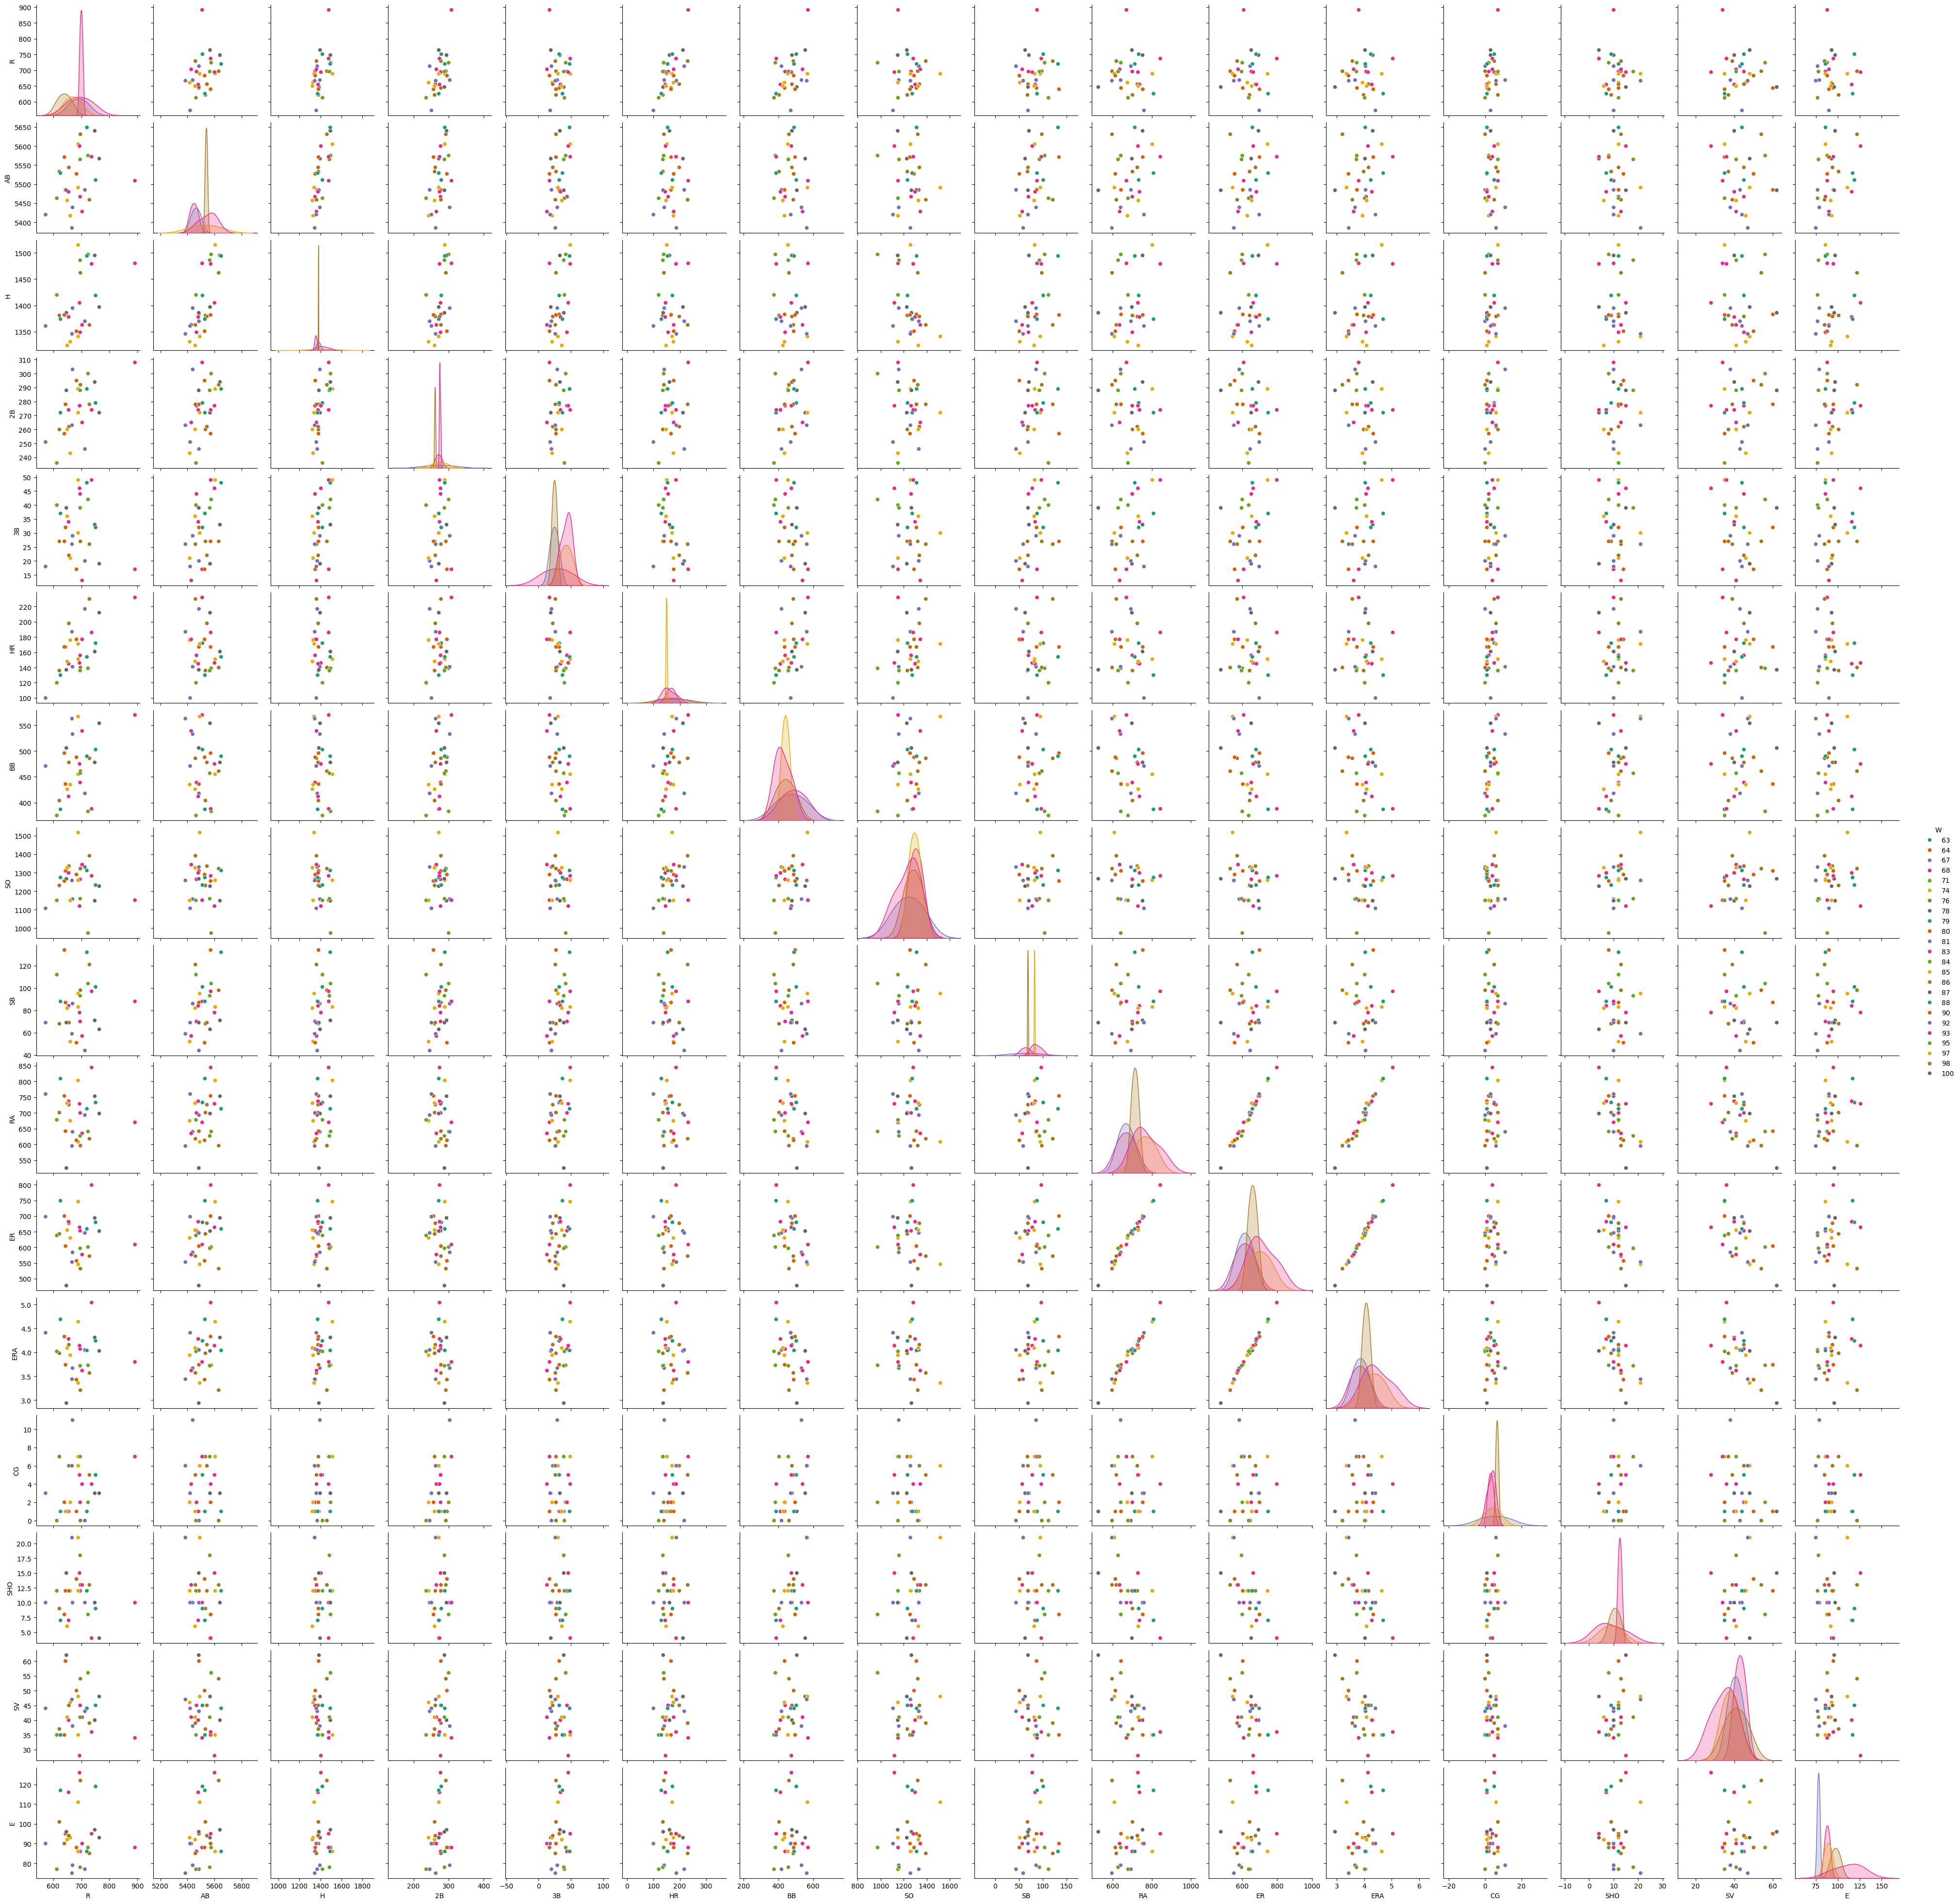

In [25]:
sns.pairplot(df, palette="Dark2", hue="W");

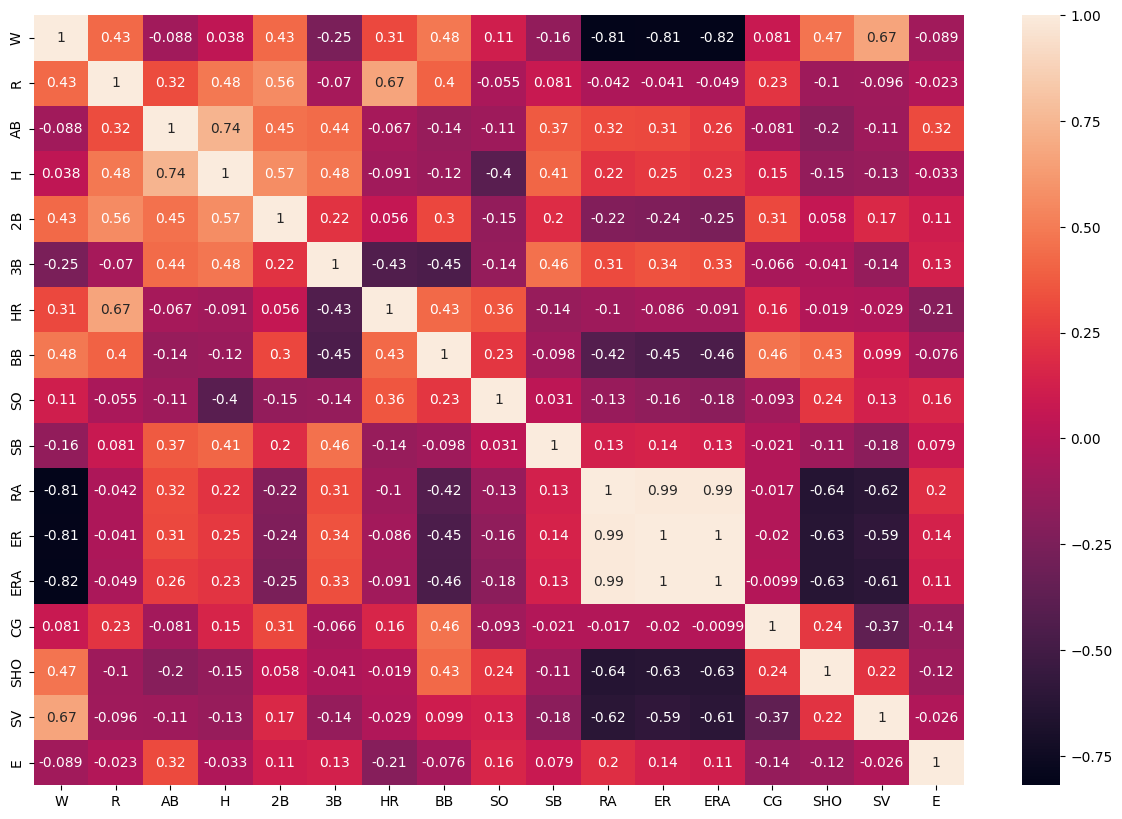

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

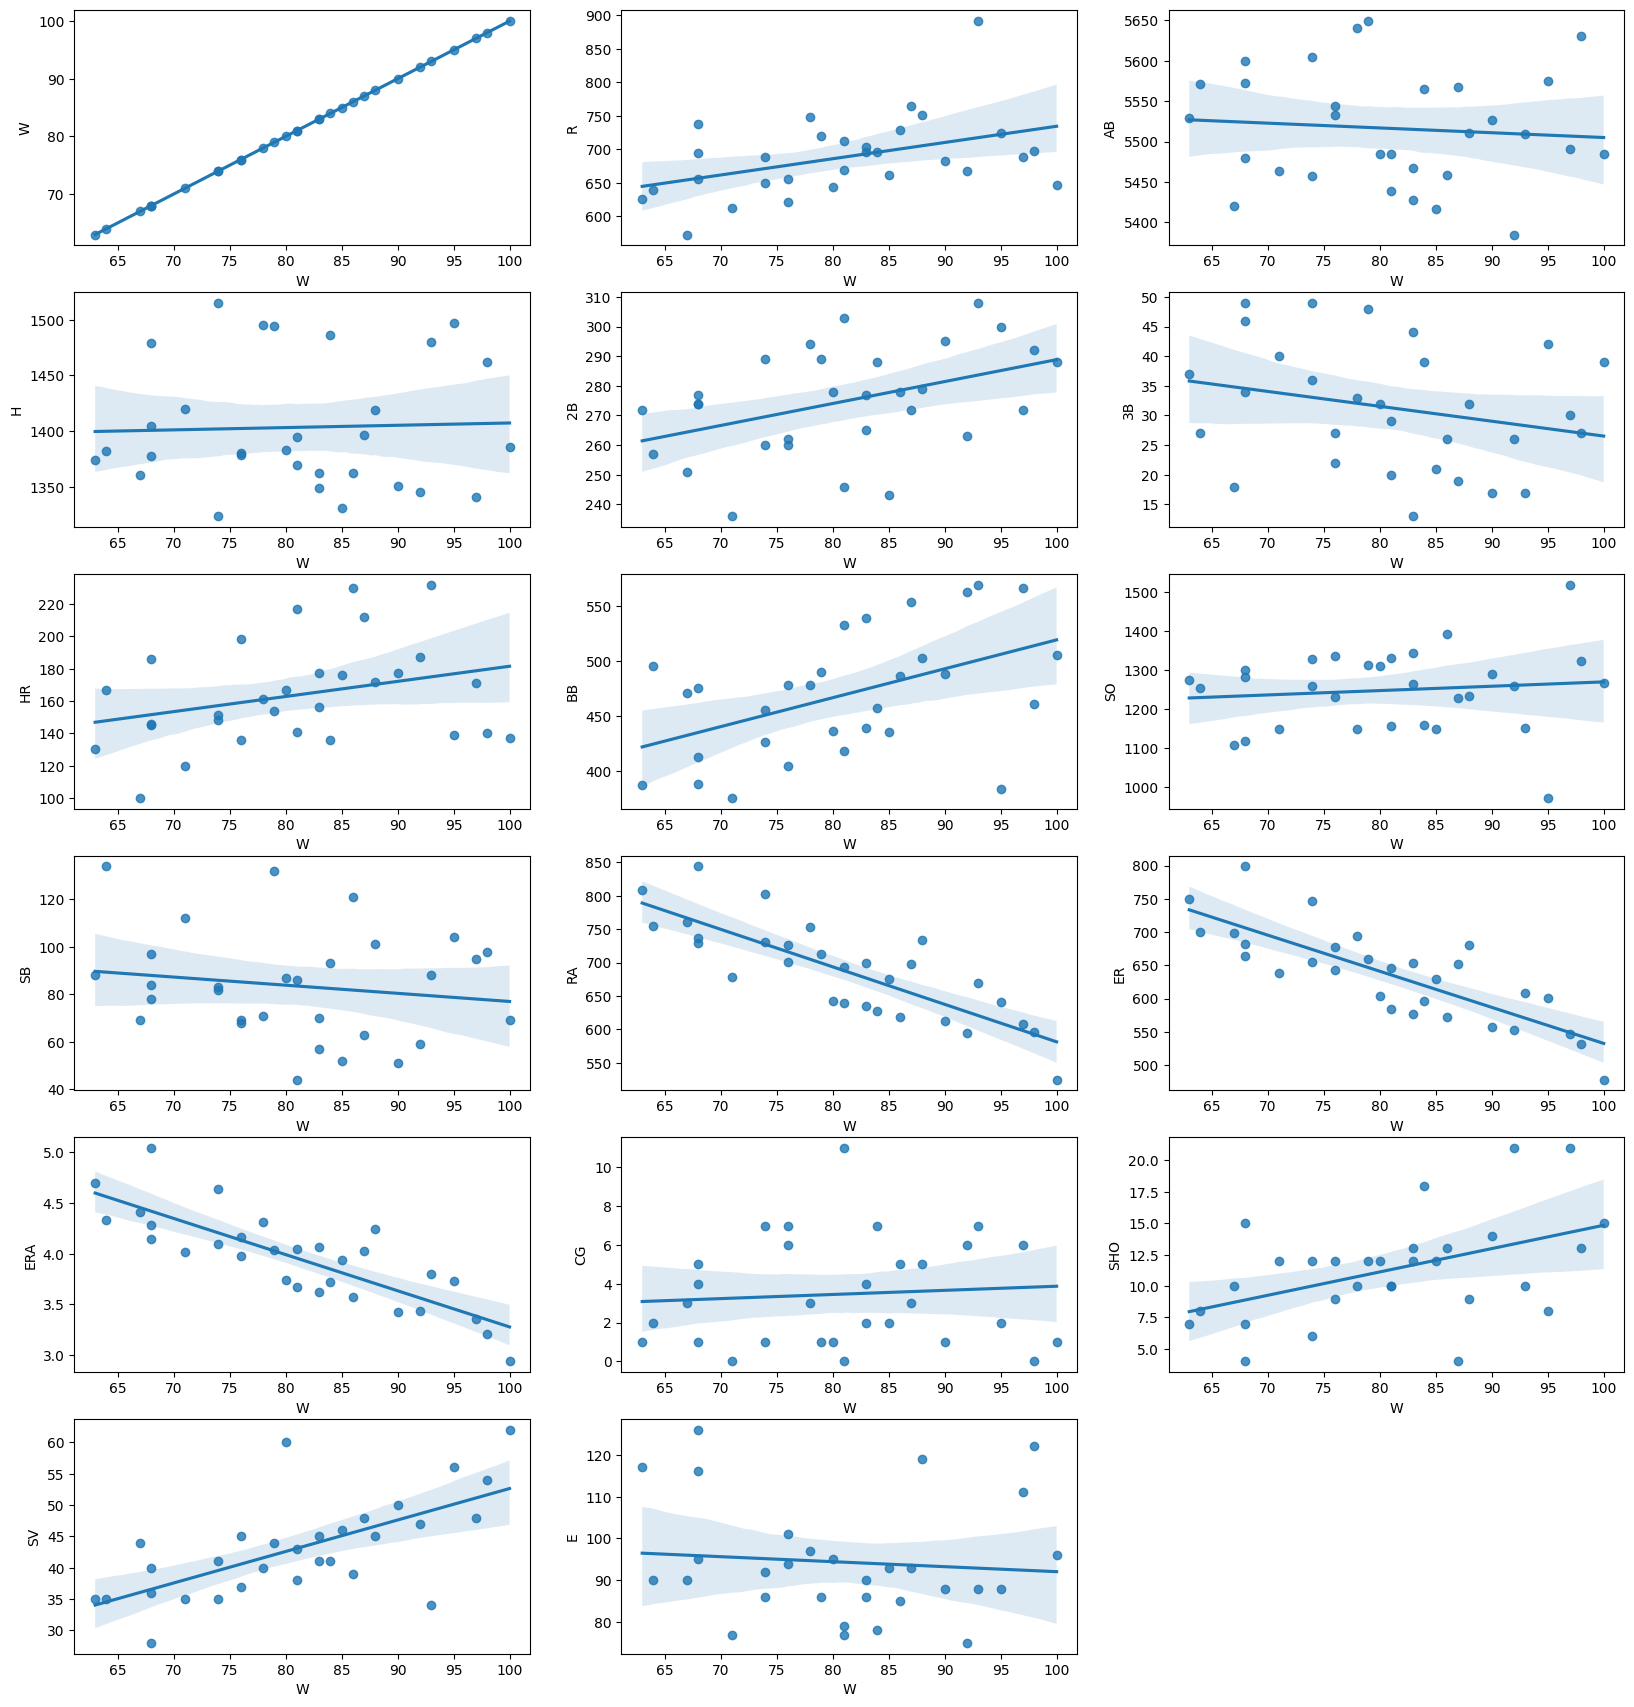

In [31]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=21:
        plt.subplot(7,3,p)
        sns.regplot(x='W', y=i, data=df)
        plt.xlabel('W')
        plt.ylabel(i)
    p+=1
plt.show()

MODEL PREPARATION

In [33]:
# checking skewness

df_skew = df.skew()
df_skew

W      0.05
R      1.20
AB     0.18
H      0.67
2B    -0.23
3B     0.13
HR     0.52
BB     0.16
SO    -0.16
SB     0.48
RA     0.05
ER     0.06
ERA    0.05
CG     0.74
SHO    0.57
SV     0.66
E      0.89
dtype: float64

In [35]:
# Removing skewness using cuberoot

for index, value in df_skew.items():
  if value > 0.5 or value < -0.5:
    df[index] = np.cbrt(df[index])
df.skew()

W      0.05
R      0.89
AB     0.18
H      0.64
2B    -0.23
3B     0.13
HR     0.18
BB     0.16
SO    -0.16
SB     0.48
RA     0.05
ER     0.06
ERA    0.05
CG    -1.04
SHO   -0.28
SV     0.33
E      0.72
dtype: float64

In [36]:
# Assigning Feature & Target Data

x = df.drop('W', axis=1)
y = df[['W']]

In [37]:
scaler = preprocessing.StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [38]:
# checking variance inflation factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF values,features
0,11.30,R
1,12.28,AB
2,8.69,H
3,4.14,2B
4,3.00,3B
5,10.68,HR
6,3.76,BB
7,2.77,SO
8,1.91,SB
9,194.72,RA


In [39]:
x = x.drop(['ERA'], axis=1)

In [40]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF values,features
0,10.54,R
1,4.19,AB
2,8.37,H
3,4.06,2B
4,2.99,3B
5,9.63,HR
6,3.73,BB
7,2.76,SO
8,1.74,SB
9,170.24,RA


In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=39)

MODEL CREATION

In [42]:
reg = LazyRegressor(verbose=0,  ignore_warnings=False, custom_metric=None)
reg_models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)
print(reg_models)

 79%|███████▊  | 33/42 [00:01<00:00, 26.76it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:01<00:00, 21.09it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 22, number of used features: 0
[LightGBM] [Info] Start training from score 81.272727
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spl

MODEL EVALUATION

In [43]:
from sklearn.linear_model import Ridge
r_clf = Ridge(random_state = 39)

In [44]:
r_clf.fit(xtrain, ytrain)

Ridge(random_state=39)

In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid_param = {'alpha':[0.0001,0.001,0.01,0.1,1,10],
              'fit_intercept': [True,False],
              'copy_X': [True, False],
              'tol':[0.0001,0.001,0.01,0.1,1,10]}

In [46]:
grid_search = GridSearchCV(estimator=r_clf, param_grid=grid_param, cv=2, verbose=3)

In [47]:
grid_search.fit(xtrain, ytrain)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.0001;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.001;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.01;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=0.397 total time=   0.0s
[CV 2/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=0.1;, score=-0.978 total time=   0.0s
[CV 1/2] END alpha=0.0001, copy_X=True, fit_intercept=True, tol=1;, score=0.397 total time=   0.0s
[CV 2/2] END a

GridSearchCV(cv=2, estimator=Ridge(random_state=39),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=3)

In [48]:
grid_search.best_params_

{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'tol': 0.0001}

In [49]:
Final_model = Ridge(alpha=10, copy_X=True, fit_intercept=True, tol=0.0001)
Final_model.fit(xtrain, ytrain)

Ridge(alpha=10)

In [50]:
from sklearn.metrics import r2_score

rd_pred= Final_model.predict(xtest)
r2s=r2_score(ytest, rd_pred)
print('r2 score:', r2s*100)

r2 score: 84.645444512901
